# Exploratory Data Analysis 📁

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import requests

## Data Loading

In [ ]:
def get_noaa_data(token, datasetid, stationid, startdate, enddate, datatypeid):
    """ 
    Uses NOAA's API to retrieve climate data based on given parameters.
    Returns JSON data if successful.
    """
    url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": token}
    params = {
        "datasetid": datasetid,
        "stationid": stationid,
        "startdate": startdate,
        "enddate": enddate,
        "datatypeid": datatypeid,
        "limit": 1000,
        "units": "metric"
    }

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        print(response.text)
        return None

In [19]:
# Get token
load_dotenv()
token = os.getenv("NOAA_TOKEN")

data = get_noaa_data(
    token=token,
    datasetid="GSOM",
    stationid="GHCND:USW00014989",
    startdate="2017-01-01",
    enddate="2024-12-31",
    datatypeid="TAVG"
)

In [ ]:
results = data.get("results", [])
df = pd.DataFrame(results)
df["date"] = pd.to_datetime(df["date"])
df["value"] = df["value"]/10
df.to_parquet("../Data/raw_data.parquet")

Note: you may need to restart the kernel to use updated packages.


## Data Overview

In [5]:
df = pd.read_parquet("../Data/raw_data.parquet")
print(df.shape)
df.info()

(90, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        90 non-null     datetime64[ns]
 1   datatype    90 non-null     object        
 2   station     90 non-null     object        
 3   attributes  90 non-null     object        
 4   value       90 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.6+ KB


In [6]:
df.describe()

,date,value
count,90,90.000000
mean,2021-02-09 19:28:00,1.082778
min,2017-02-01 00:00:00,-0.790000
25%,2019-03-08 18:00:00,0.247500
50%,2021-03-16 12:00:00,1.040000
75%,2023-01-24 06:00:00,2.087500
max,2024-12-01 00:00:00,2.440000
std,NaN,0.980021


## Data Cleaning

In [45]:
df = df.sort_values("date")

In [46]:
df.set_index("date", inplace=True)

In [42]:
df.isnull().sum()
df[df.isnull().any(axis=1)]

,datatype,station,attributes,value
date,,,,


In [47]:
df = df["value"]

In [50]:
df.rename("AverageTemperature")

date
2017-02-01    0.47
2017-03-01    0.61
2017-04-01    1.06
2017-05-01    1.59
2017-06-01    2.30
              ... 
2024-08-01    2.14
2024-09-01    1.99
2024-10-01    1.45
2024-11-01    0.53
2024-12-01    0.00
Name: AverageTemperature, Length: 90, dtype: float64

In [52]:
df = df.to_frame()
df.to_parquet("../Data/clean_data.parquet")


## Univariate Analysis

In [2]:
serie = pd.read_parquet("../Data/clean_data.parquet")
serie = pd.Series(serie["value"], name="AverageTemperature")
serie.sample(5)

date
2019-01-01   -0.34
2019-05-01    1.44
2019-08-01    2.16
2022-12-01   -0.45
2021-09-01    2.00
Name: AverageTemperature, dtype: float64

In [3]:
serie.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 90 entries, 2017-02-01 to 2024-12-01
Series name: AverageTemperature
Non-Null Count  Dtype  
--------------  -----  
90 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


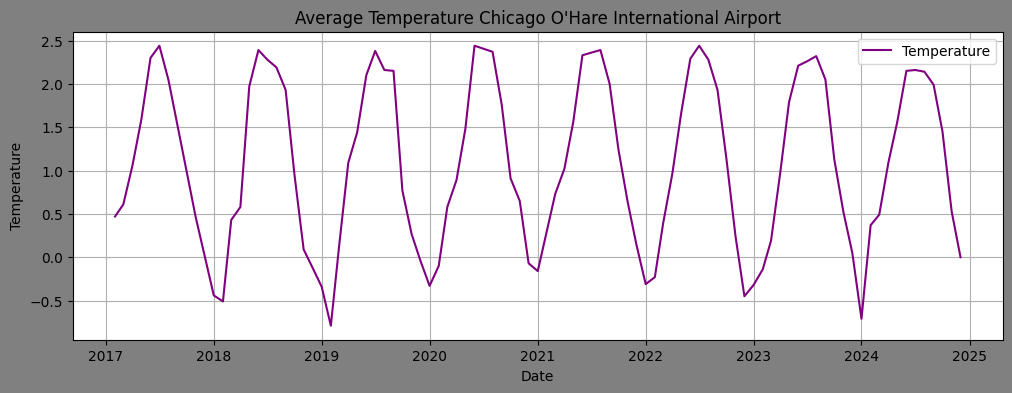

In [27]:
plt.figure(figsize=(12, 4), facecolor="gray")
plt.plot(serie, color="purple", label='Temperature')
plt.title("Average Temperature Chicago O'Hare International Airport")
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.legend(loc='upper right')
plt.grid()
plt.savefig('../Outputs/Figures/time_serie')
plt.show()

📁 EDA
Get Data

Clean Data

Exploración inicial

.head(), .info(), .describe()

Gráfica de la serie completa

Revisión de nulos y outliers

Análisis de Estacionariedad

Tendencia y estacionalidad (visual)

Test de Dickey-Fuller (ADF)

Diferenciación si es necesario

Identificación inicial de parámetros

ACF y PACF

STL decomposition

👉 Aquí terminas con una serie transformada (estacionaria) y con sugerencias iniciales de (p,d,q)(P,D,Q).